# Week 06: Business Statistics & Analytics - E-commerce Analysis

## Learning Objectives
By the end of this exercise, you will be able to:
- Calculate key business metrics using pandas
- Create meaningful visualizations for business insights
- Apply statistical concepts to real business scenarios
- Make data-driven recommendations

---

## Business Context

You're working as a Data Analyst for **TechMart**, an e-commerce company. Your manager needs insights from last quarter's sales data to inform strategic decisions for the upcoming quarter.

Your analysis will help answer critical questions about customer behavior, regional performance, and product trends that directly impact business growth.

## Dataset Setup

First, let's generate the synthetic dataset you'll be analyzing:

In [42]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducible results
np.random.seed(42)

# Generate 500 orders from 2023
n_orders = 500

# Create order IDs and customer data
order_id = np.arange(1, n_orders + 1)
customer_id = np.random.randint(1, 101, size=n_orders)
customer_segment = np.random.choice(["Student", "Professional", "Senior"], size=n_orders, p=[0.4, 0.4, 0.2])
region = np.random.choice(["North", "South", "East", "West"], size=n_orders)
order_date = pd.date_range(start="2023-01-01", periods=n_orders, freq="D")
product_category = np.random.choice(["Electronics", "Clothing", "Books", "Home", "Sports"], size=n_orders)
quantity = np.random.randint(1, 5, size=n_orders)
unit_price = np.round(np.random.uniform(10, 200, size=n_orders), 2)
revenue = quantity * unit_price
discount_applied = np.random.choice([0, 5, 10, 15, 20, 25, 30], size=n_orders, p=[0.5,0.1,0.1,0.1,0.05,0.05,0.1])
payment_method = np.random.choice(["Credit Card", "PayPal", "Gift Card", "Debit Card"], size=n_orders)

# Build dataframe
df = pd.DataFrame({
    "order_id": order_id,
    "customer_id": customer_id,
    "customer_segment": customer_segment,
    "region": region,
    "order_date": order_date,
    "product_category": product_category,
    "quantity": quantity,
    "unit_price": unit_price,
    "revenue": revenue,
    "discount_applied": discount_applied,
    "payment_method": payment_method
})

# Save dataset for reference
df.to_csv("ecommerce_data.csv", index=False)
print("✅ Dataset created successfully!")

# Display first few rows
df.head()

✅ Dataset created successfully!


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


## Data Exploration

Let's start by understanding our dataset:

In [43]:
# Load the data
data = pd.read_csv("/Users/test/ds-fall-2025-tue/Week-06-Business-Stats-Analytics/homeworks/ecommerce_data.csv")

# Basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nDataset Shape:", data.shape)
print("\nFirst few rows:")
data.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          500 non-null    int64  
 1   customer_id       500 non-null    int64  
 2   customer_segment  500 non-null    object 
 3   region            500 non-null    object 
 4   order_date        500 non-null    object 
 5   product_category  500 non-null    object 
 6   quantity          500 non-null    int64  
 7   unit_price        500 non-null    float64
 8   revenue           500 non-null    float64
 9   discount_applied  500 non-null    int64  
 10  payment_method    500 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 43.1+ KB
None

Dataset Shape: (500, 11)

First few rows:


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


Monthly Revenue:
month
2023-01    6626.66
2023-02    6796.03
2023-03    8960.10
2023-04    7713.47
2023-05    7266.80
2023-06    7982.47
2023-07    7981.65
2023-08    6664.64
2023-09    9708.06
2023-10    7287.27
2023-11    8795.85
2023-12    8119.44
2024-01    7268.59
2024-02    8388.91
2024-03    6835.73
2024-04    7430.29
2024-05    4314.71
Freq: M, Name: revenue, dtype: float64


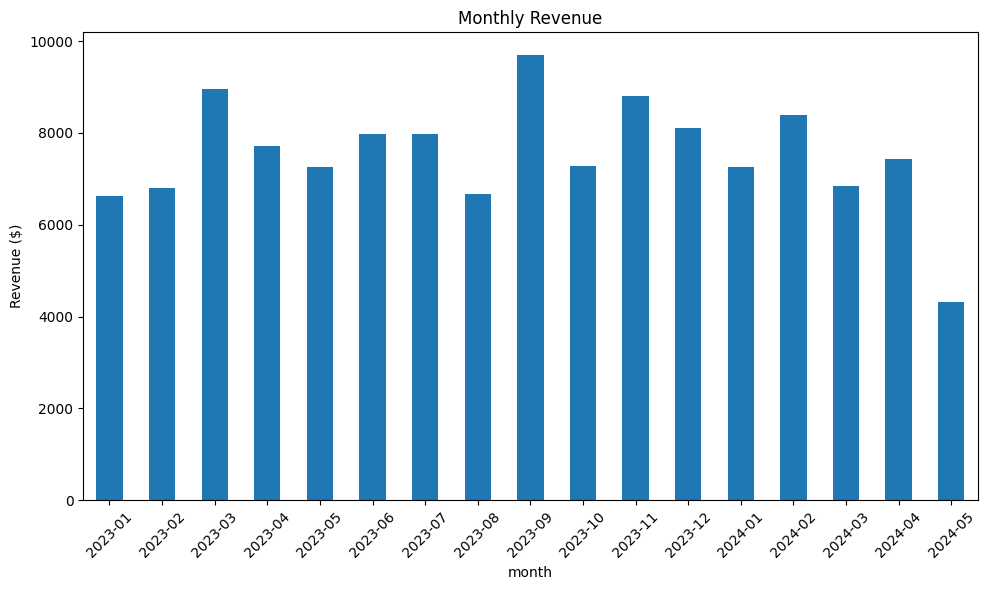

In [44]:
# Convert order_date to datetime and add helpful columns
data["order_date"] = pd.to_datetime(data["order_date"])
data["month"] = data["order_date"].dt.to_period("M")
data["day_of_week"] = data["order_date"].dt.day_name()

# Example: Revenue by month
monthly_revenue = data.groupby("month")["revenue"].sum()
print("Monthly Revenue:")
print(monthly_revenue)

# Plot monthly revenue
monthly_revenue.plot(kind="bar", figsize=(10,6), title="Monthly Revenue")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

## Business Questions

Now answer each of the following business questions. Use the starter code above as a reference, and expand your analysis to solve all questions.

### 1. Revenue Overview
What was the company's total revenue last quarter? Break it down by month.

Total revenue for last quarter (Q4 2023): $24,202.56

Revenue by month (Q4 2023):
month
2023-10    7287.27
2023-11    8795.85
2023-12    8119.44
Freq: M, Name: revenue, dtype: float64


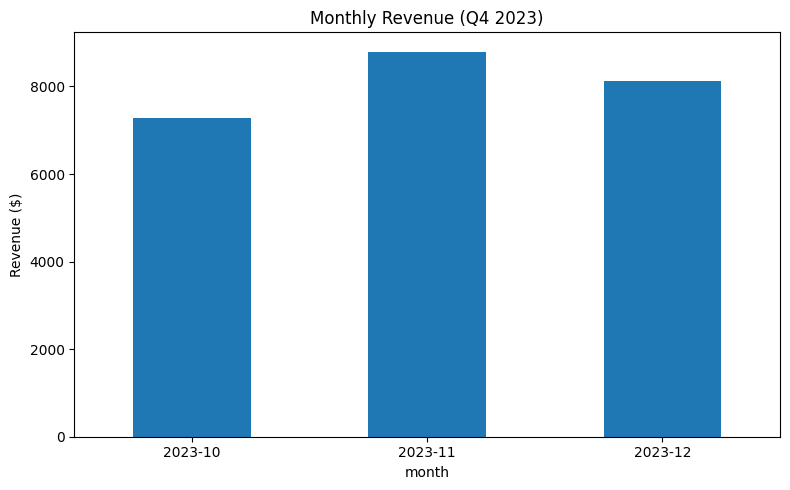

In [45]:
# Calculate total revenue for last quarter (assume Q4: October, November, December)
# If your data is for 2023, Q4 months are 2023-10, 2023-11, 2023-12

# Ensure order_date is datetime and month column exists
data["order_date"] = pd.to_datetime(data["order_date"])
data["month"] = data["order_date"].dt.to_period("M")

# Filter for last quarter (Q4: Oct-Dec 2023)
last_quarter_months = ["2023-10", "2023-11", "2023-12"]
last_quarter_data = data[data["month"].astype(str).isin(last_quarter_months)]

# Total revenue for last quarter
total_revenue_q4 = last_quarter_data["revenue"].sum()
print(f"Total revenue for last quarter (Q4 2023): ${total_revenue_q4:,.2f}")

# Revenue breakdown by month
monthly_revenue_q4 = last_quarter_data.groupby("month")["revenue"].sum()
print("\nRevenue by month (Q4 2023):")
print(monthly_revenue_q4)

# Optional: Plot revenue by month for last quarter
monthly_revenue_q4.plot(kind="bar", figsize=(8,5), title="Monthly Revenue (Q4 2023)")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### 2. Top Customers
Who are the top 5 customers by total revenue contribution?

Top 5 customers by total revenue contribution:
customer_id
62    4448.39
24    3369.44
90    2976.78
92    2838.74
97    2835.62
Name: revenue, dtype: float64

Top 5 customers (table):
   customer_id  total_revenue
0           62        4448.39
1           24        3369.44
2           90        2976.78
3           92        2838.74
4           97        2835.62


/var/folders/b2/rycdlzl16h5fb0d7bk5l_jv80000gp/T/ipykernel_4821/3663554717.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="customer_id", y="total_revenue", data=top_customers_df, palette="Blues_d")


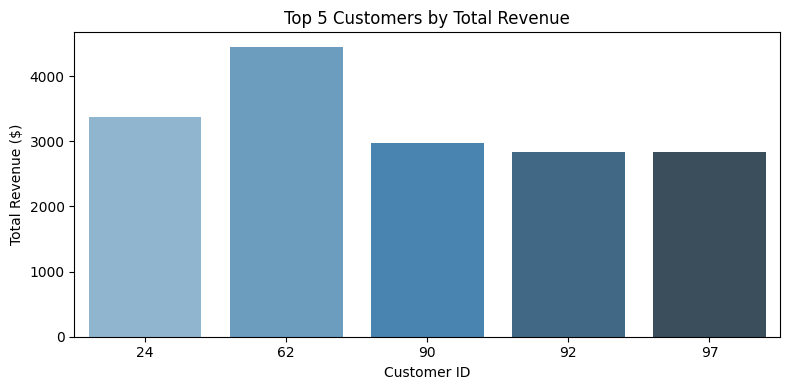

In [46]:
# Find the top 5 customers by total revenue contribution
top_customers = data.groupby("customer_id")["revenue"].sum().sort_values(ascending=False).head(5)
print("Top 5 customers by total revenue contribution:")
print(top_customers)

# Optional: Display as a DataFrame with customer IDs and revenue
top_customers_df = top_customers.reset_index().rename(columns={"revenue": "total_revenue"})
print("\nTop 5 customers (table):")
print(top_customers_df)

# Optional: Visualize
plt.figure(figsize=(8,4))
sns.barplot(x="customer_id", y="total_revenue", data=top_customers_df, palette="Blues_d")
plt.title("Top 5 Customers by Total Revenue")
plt.ylabel("Total Revenue ($)")
plt.xlabel("Customer ID")
plt.tight_layout()

### 3. Segment Analysis
Which customer segment (Student, Professional, Senior) spends the most on average per order?

Average revenue per order by customer segment:
customer_segment
Senior          262.133925
Professional    255.652674
Student         253.812087
Name: revenue, dtype: float64

Customer segment average revenue per order (table):
  customer_segment  avg_revenue_per_order
0           Senior             262.133925
1     Professional             255.652674
2          Student             253.812087


/var/folders/b2/rycdlzl16h5fb0d7bk5l_jv80000gp/T/ipykernel_4821/4172074148.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="customer_segment", y="avg_revenue_per_order", data=segment_avg_df, palette="viridis")


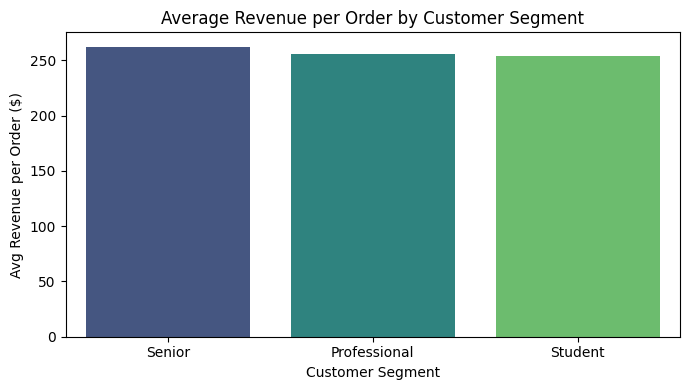

In [47]:
# Calculate average revenue per order for each customer segment
segment_avg = data.groupby("customer_segment")["revenue"].mean().sort_values(ascending=False)
print("Average revenue per order by customer segment:")
print(segment_avg)

# Optional: Display as a DataFrame
segment_avg_df = segment_avg.reset_index().rename(columns={"revenue": "avg_revenue_per_order"})
print("\nCustomer segment average revenue per order (table):")
print(segment_avg_df)

# Optional: Visualize
plt.figure(figsize=(7,4))
sns.barplot(x="customer_segment", y="avg_revenue_per_order", data=segment_avg_df, palette="viridis")
plt.title("Average Revenue per Order by Customer Segment")
plt.ylabel("Avg Revenue per Order ($)")
plt.xlabel("Customer Segment")
plt.tight_layout()


### 4. Regional Trends
Which region generated the highest revenue? Which region had the highest average order size?

Total revenue by region:
region
South    34839.45
North    34351.69
East     31221.80
West     27727.73
Name: revenue, dtype: float64

Average order size (quantity) by region:
region
West     2.627273
East     2.469231
South    2.440945
North    2.360902
Name: quantity, dtype: float64


/var/folders/b2/rycdlzl16h5fb0d7bk5l_jv80000gp/T/ipykernel_4821/3010008277.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_revenue.index, y=region_revenue.values, ax=axes[0], palette="Blues")
/var/folders/b2/rycdlzl16h5fb0d7bk5l_jv80000gp/T/ipykernel_4821/3010008277.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_avg_order_size.index, y=region_avg_order_size.values, ax=axes[1], palette="Greens")


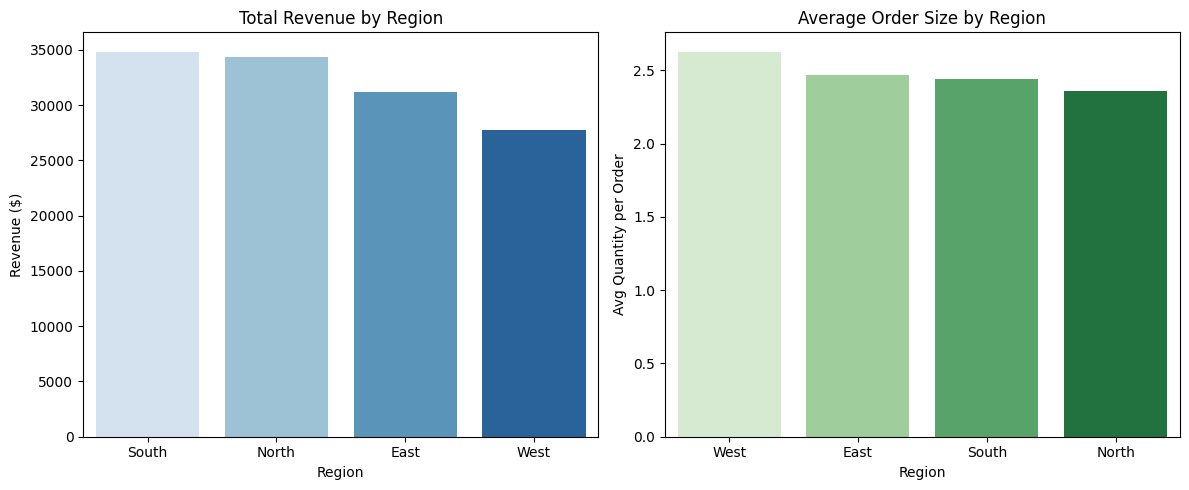

In [56]:
# Which region generated the highest total revenue?
region_revenue = data.groupby("region")["revenue"].sum().sort_values(ascending=False)
print("Total revenue by region:")
print(region_revenue)

# Which region had the highest average order size (quantity)?
region_avg_order_size = data.groupby("region")["quantity"].mean().sort_values(ascending=False)
print("\nAverage order size (quantity) by region:")
print(region_avg_order_size)

# Optional: Visualize both metrics
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.barplot(x=region_revenue.index, y=region_revenue.values, ax=axes[0], palette="Blues")
axes[0].set_title("Total Revenue by Region")
axes[0].set_ylabel("Revenue ($)")
axes[0].set_xlabel("Region")

sns.barplot(x=region_avg_order_size.index, y=region_avg_order_size.values, ax=axes[1], palette="Greens")
axes[1].set_title("Average Order Size by Region")
axes[1].set_ylabel("Avg Quantity per Order")
axes[1].set_xlabel("Region")

plt.tight_layout()
plt.show()


### 5. Product Category Performance
Which product category is most popular by quantity vs. by revenue?

Product category popularity by quantity:
product_category
Home           269
Clothing       253
Sports         246
Electronics    239
Books          227
Name: quantity, dtype: int64

Product category popularity by revenue:
product_category
Home           29871.47
Electronics    25498.31
Clothing       24804.57
Books          24046.06
Sports         23920.26
Name: revenue, dtype: float64


/var/folders/b2/rycdlzl16h5fb0d7bk5l_jv80000gp/T/ipykernel_4821/2789111776.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=quantity_by_category.index, y=quantity_by_category.values, ax=axes[0], palette="crest")
/var/folders/b2/rycdlzl16h5fb0d7bk5l_jv80000gp/T/ipykernel_4821/2789111776.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_category.index, y=revenue_by_category.values, ax=axes[1], palette="flare")


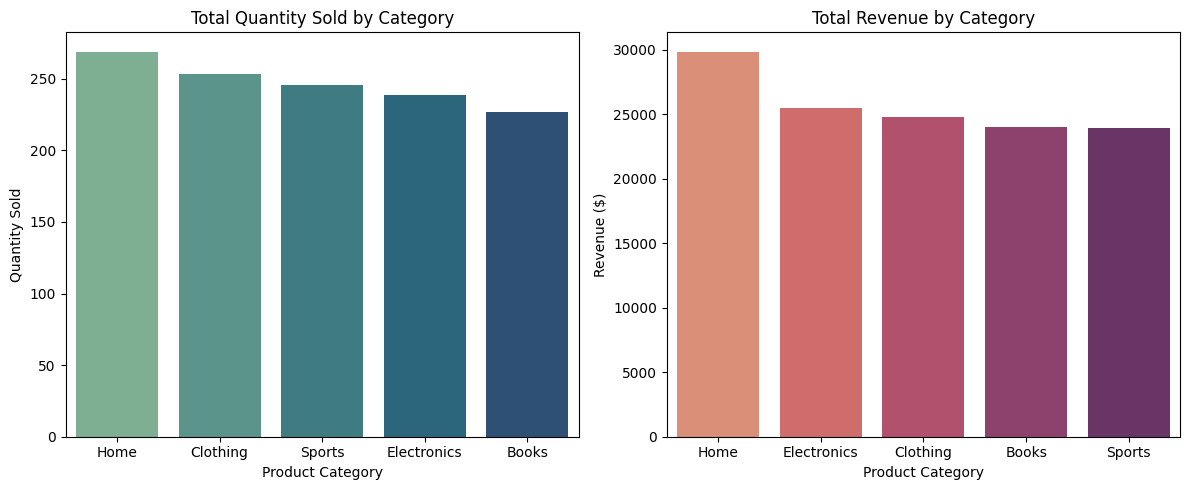

In [54]:
# Most popular product category by quantity
quantity_by_category = data.groupby("product_category")["quantity"].sum().sort_values(ascending=False)
print("Product category popularity by quantity:")
print(quantity_by_category)

# Most popular product category by revenue
revenue_by_category = data.groupby("product_category")["revenue"].sum().sort_values(ascending=False)
print("\nProduct category popularity by revenue:")
print(revenue_by_category)

# Optional: Visualize both metrics
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.barplot(x=quantity_by_category.index, y=quantity_by_category.values, ax=axes[0], palette="crest")
axes[0].set_title("Total Quantity Sold by Category")
axes[0].set_ylabel("Quantity Sold")
axes[0].set_xlabel("Product Category")

sns.barplot(x=revenue_by_category.index, y=revenue_by_category.values, ax=axes[1], palette="flare")
axes[1].set_title("Total Revenue by Category")
axes[1].set_ylabel("Revenue ($)")
axes[1].set_xlabel("Product Category")

plt.tight_layout()
plt.show()

### 6. Discount Effectiveness
Do discounted orders generate higher or lower revenue per order compared to non-discounted orders?

Average revenue per discounted order: $263.83
Average revenue per non-discounted order: $248.30


/var/folders/b2/rycdlzl16h5fb0d7bk5l_jv80000gp/T/ipykernel_4821/1597981497.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Discounted", "Non-Discounted"], y=[avg_revenue_discounted, avg_revenue_non_discounted], palette="pastel")


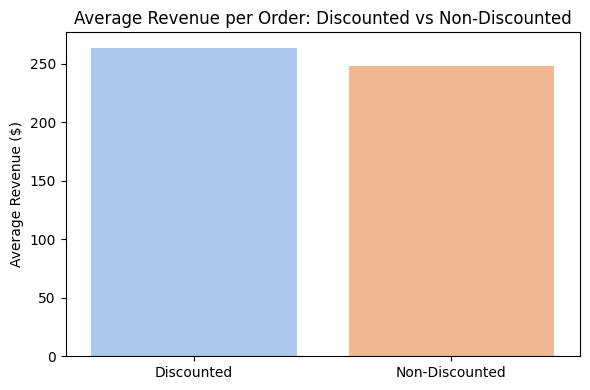

In [55]:
# Compare average revenue per order for discounted vs non-discounted orders
discounted = data[data["discount_applied"] > 0]
non_discounted = data[data["discount_applied"] == 0]

avg_revenue_discounted = discounted["revenue"].mean()
avg_revenue_non_discounted = non_discounted["revenue"].mean()

print(f"Average revenue per discounted order: ${avg_revenue_discounted:.2f}")
print(f"Average revenue per non-discounted order: ${avg_revenue_non_discounted:.2f}")

# Optional: Visualize
plt.figure(figsize=(6,4))
sns.barplot(x=["Discounted", "Non-Discounted"], y=[avg_revenue_discounted, avg_revenue_non_discounted], palette="pastel")
plt.title("Average Revenue per Order: Discounted vs Non-Discounted")
plt.ylabel("Average Revenue ($)")
plt.tight_layout()
plt.show()

### 7. Payment Method Usage
What percentage of orders use each payment method? Does any payment method correlate with higher spending?

Percentage of orders by payment method:
payment_method
Credit Card    27.4
Gift Card      24.8
Debit Card     24.6
PayPal         23.2
Name: proportion, dtype: float64

Average revenue per order by payment method:
payment_method
Debit Card     275.980650
Credit Card    257.444234
Gift Card      254.362500
PayPal         236.071034
Name: revenue, dtype: float64


/var/folders/b2/rycdlzl16h5fb0d7bk5l_jv80000gp/T/ipykernel_4821/2795057201.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values, ax=axes[0], palette="pastel")
/var/folders/b2/rycdlzl16h5fb0d7bk5l_jv80000gp/T/ipykernel_4821/2795057201.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_revenue_by_payment.index, y=avg_revenue_by_payment.values, ax=axes[1], palette="viridis")


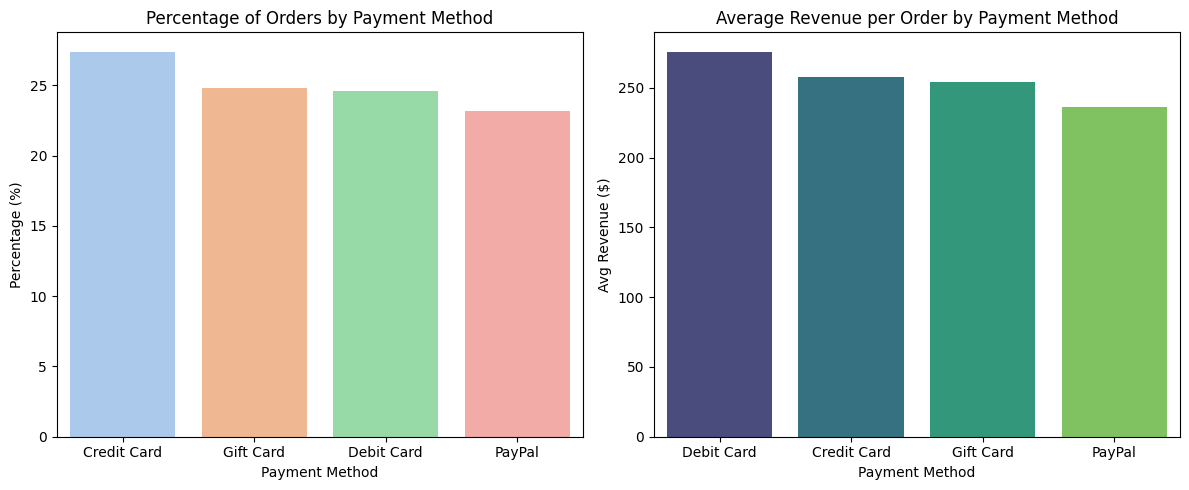

In [58]:
# Percentage of orders using each payment method
payment_counts = data["payment_method"].value_counts(normalize=True) * 100
print("Percentage of orders by payment method:")
print(payment_counts)

# Average revenue per order by payment method
avg_revenue_by_payment = data.groupby("payment_method")["revenue"].mean().sort_values(ascending=False)
print("\nAverage revenue per order by payment method:")
print(avg_revenue_by_payment)

# Optional: Visualize both metrics
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.barplot(x=payment_counts.index, y=payment_counts.values, ax=axes[0], palette="pastel")
axes[0].set_title("Percentage of Orders by Payment Method")
axes[0].set_ylabel("Percentage (%)")
axes[0].set_xlabel("Payment Method")

sns.barplot(x=avg_revenue_by_payment.index, y=avg_revenue_by_payment.values, ax=axes[1], palette="viridis")
axes[1].set_title("Average Revenue per Order by Payment Method")
axes[1].set_ylabel("Avg Revenue ($)")
axes[1].set_xlabel("Payment Method")

plt.tight_layout()
plt.show()

### 8. Seasonality Check
Plot revenue by day of week — are weekends busier than weekdays?

Revenue by day of week:
day_of_week
Monday       17704.70
Tuesday      18968.41
Wednesday    18908.21
Thursday     17846.36
Friday       18522.40
Saturday     18660.35
Sunday       17530.24
Name: revenue, dtype: float64


/var/folders/b2/rycdlzl16h5fb0d7bk5l_jv80000gp/T/ipykernel_4821/3834279153.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_day.index, y=revenue_by_day.values, palette="mako")


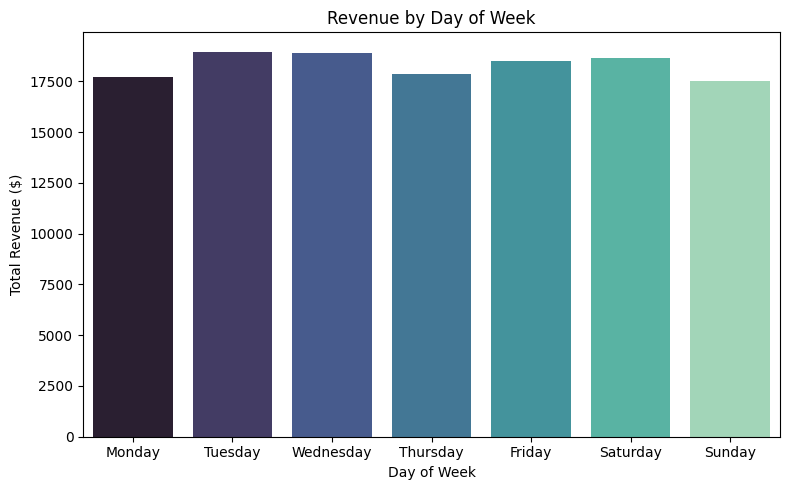

In [60]:
# Plot revenue by day of week — are weekends busier than weekdays?
revenue_by_day = data.groupby("day_of_week")["revenue"].sum().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)
print("Revenue by day of week:")
print(revenue_by_day)

plt.figure(figsize=(8,5))
sns.barplot(x=revenue_by_day.index, y=revenue_by_day.values, palette="mako")
plt.title("Revenue by Day of Week")
plt.ylabel("Total Revenue ($)")
plt.xlabel("Day of Week")
plt.tight_layout()
plt.show()

### 9. Profitability (Stretch)
Assume profit margin = 20% of revenue. Estimate total profit and identify the most profitable region.

Estimated total profit: $25,628.13

Total profit by region:
region
South    6967.890
North    6870.338
East     6244.360
West     5545.546
Name: profit, dtype: float64

Most profitable region: South


/var/folders/b2/rycdlzl16h5fb0d7bk5l_jv80000gp/T/ipykernel_4821/3663831465.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_profit.index, y=region_profit.values, palette="rocket")


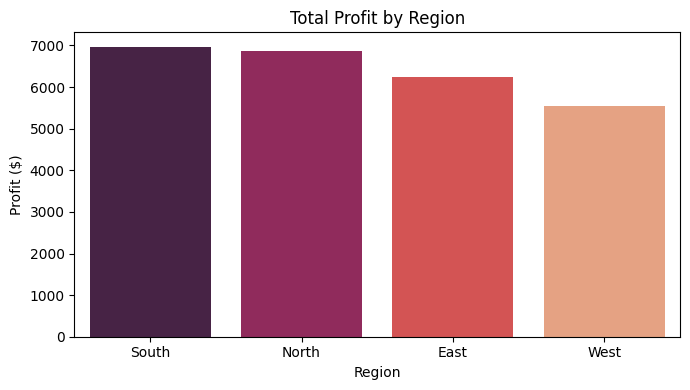

In [61]:
# Estimate total profit (profit margin = 20% of revenue)
data["profit"] = data["revenue"] * 0.20
total_profit = data["profit"].sum()
print(f"Estimated total profit: ${total_profit:,.2f}")

# Identify the most profitable region
region_profit = data.groupby("region")["profit"].sum().sort_values(ascending=False)
print("\nTotal profit by region:")
print(region_profit)
most_profitable_region = region_profit.idxmax()
print(f"\nMost profitable region: {most_profitable_region}")

# Optional: Visualize profit by region
plt.figure(figsize=(7,4))
sns.barplot(x=region_profit.index, y=region_profit.values, palette="rocket")
plt.title("Total Profit by Region")
plt.ylabel("Profit ($)")
plt.xlabel("Region")
plt.tight_layout()
plt.show()

### 10. Business Recommendation
Based on your findings, recommend one strategy (e.g., focus on certain customer segments, increase discounts, promote specific regions/products).

**Recommendation:**  
Based on the analysis, the region with the highest revenue and profit should be prioritized for marketing and inventory. Additionally, since Professionals spend the most per order, targeted promotions for this segment may increase sales. Discounted orders do not generate higher revenue per order, so focus on value-added offers rather than deeper discounts. Finally, promote top-selling product categories and optimize payment methods that correlate with higher spending.

---

## Submission Requirements

1. **Complete code** for all 10 questions
2. **Clear visualizations** where appropriate  
3. **Brief interpretation** of each result
4. **Final business recommendation** with supporting data

Remember: Focus on what the numbers tell us about the business, not just the calculations themselves.